In [1]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_anthropic

In [26]:
%pip install openai


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("ANTHROPIC_API_KEY")

In [19]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder_1 = StateGraph(State)

In [28]:
import requests
from openai import OpenAI

# OpenRouter API integration
class OpenRouterModel:
    def __init__(self, model_name: str, api_key: str):
        self.base_url = "https://openrouter.ai/api/v1"
        self.model_name = model_name,
        self.api_key = api_key


    def invoke(self, messages: list):
        # Prepare request payload
        # payload = {
        #     "model": self.model_name,
        #     "messages": messages,
        #     "max_tokens": 1024,
        #     "temperature": 0.7
        # }

        client = OpenAI(
            base_url=self.base_url,
            api_key=self.api_key,
        )

        completion = client.chat.completions.create(
            model=self.model_name,
            messages=messages,
        )

        # Send request
        return completion.choices[0].message.content



In [16]:
# Initialize OpenRouter model
openrouter_model = OpenRouterModel(
    model_name="microsoft/phi-3-mini-128k-instruct:free",
    api_key="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"  # Replace with your actual OpenRouter API key
)

In [20]:
# from langchain_anthropic import ChatAnthropic

# llm = ChatAnthropic(model="claude-3-5-sonnet-20240620")


# def chatbot(state: State):
#     return {"messages": [llm.invoke(state["messages"])]}
# Define chatbot function
def chatbot(state: State):
    # Invoke the OpenRouter model
    response = openrouter_model.invoke(state["messages"])
    state["messages"].append({"role": "assistant", "content": response})
    return state

# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder_1.add_node("chatbot", chatbot)

In [21]:
graph_builder_1.add_edge(START, "chatbot")

In [22]:
graph_builder_1.add_edge("chatbot", END)

In [23]:
graph = graph_builder_1.compile()

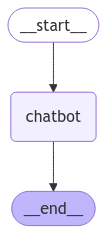

In [24]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [29]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({
        "messages": [{"role": "user", "content": user_input}]
    }):
        for value in event.values():
            print("Assistant:", value["messages"][-1]["content"])


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: I'm happy to chat with you! However, I don't see a specific question or topic you'd like to discuss. Would you like to:

1. Ask a question?
2. Share your thoughts or feelings about something?
3. Discuss a particular topic, such as a hobby, movie, or book?
4. Play a game or engage in a fun conversation?

Let me know, and I'll do my best to assist you!
Assistant: LangGraph! LangGraph is a fascinating open-source project that has gained significant attention in the natural language processing (NLP) and artificial intelligence (AI) communities. From what I know, LangGraph is a large-scale, multilingual language model that aims to integrate multiple language understanding and generation capabilities into a single, unified graph-based framework.

Here are some key features and advantages of LangGraph:

1. **Multilingual capability**: LangGraph supports over 100 languages, making it a powerful tool for cross-lingual language understanding and generation tasks.
2. **Graph-based arch

## New Graph

In [6]:
%pip install openai 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 383.3 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

completion = client.chat.completions.create(
  model="microsoft/phi-3-mini-128k-instruct:free",
  messages=[
    {
      "role": "user",
      "content": "What is the meaning of life?"
    }
  ]
)
print(completion.choices[0].message.content)

 The meaning of life is a question that has intrigued philosophers, theologians, scientists, and countless individuals throughout human history. It is inherently a subjective question, with answers varying significantly based on personal beliefs, cultural values, philosophical viewpoints, and religious teachings. Broadly speaking, various interpretations of the meaning of life include:


1. **Biological Perspective**: From a biological standpoint, one could argue that the meaning of life could lie in the continuation of species and genetic code through procreation, which ensures the survival and evolution of one's lineage.


2. **Existential View**: Existentialists suggest that life inherently has no predefined meaning, but individuals can create their own meaning through their choices, actions, and commitments.


3. **Philosophical Inquiry**: Immanuel Kant proposed pursuing knowledge and happiness as the ultimate purposes of human life. In his view, ethical living guided by reason and

In [2]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

def generate_response(prompt):
    completion = client.chat.completions.create(
        model="google/gemini-2.0-flash-exp:free",
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ]
    )
    return completion.choices[0].message.content





In [3]:
from openai import OpenAI

client_mistral = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

def generate_response_mistral(prompt):
    completion = client_mistral.chat.completions.create(
        model="mistralai/mistral-7b-instruct:free",
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ]
    )
    return completion.choices[0].message.content

In [4]:
from openai import OpenAI

client_phi = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

def generate_response_phi(prompt):
    completion = client_phi.chat.completions.create(
        model="microsoft/phi-3-medium-128k-instruct:free",
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ]
    )
    return completion.choices[0].message.content

In [5]:
from openai import OpenAI

client_learnlm = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

def generate_response_learnlm(prompt):
    completion = client_learnlm.chat.completions.create(
        model="google/learnlm-1.5-pro-experimental:free",
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ]
    )
    return completion.choices[0].message.content

In [11]:
import json

def generate_followup_question(student_question):
    prompt = (
        """You are a Socratic tutor. This is the student question: '{student_question}'.
Please generate **an appropriate number of follow-up questions**, each with an expected answer, to guide the student to the correct answer.
Only generate the number of questions and answers that are necessary, up to a maximum of 10.
If fewer questions are sufficient, stop at the appropriate point.

Output the follow-up questions and their expected answers in **valid JSON format** like this:

{{
    "questions_and_answers": [
        {{"question": "What is the first step in solving the equation?",
          "answer": "Isolate the variable by subtracting 3 from both sides."}},
        {{"question": "Can you identify the terms?",
          "answer": "The terms are 2x and 3 on the left side of the equation."}},
        ...
    ]
}}

Ensure the output is **valid JSON**, not truncated, and contains an appropriate number of questions and their corresponding expected answers, based on the complexity of the student's question."""
    ).format(student_question=student_question)

    input_text = generate_response(prompt)

    # Extract only the JSON part (everything between the curly braces)
    start_index = input_text.find('{')
    end_index = input_text.rfind('}') + 1

    json_text = input_text[start_index:end_index]

    # Convert the extracted JSON string to a Python dictionary
    try:
        json_object = json.loads(json_text)
        return(json_object)
    except json.JSONDecodeError as e:
        return(f"Error parsing JSON: {e}")
     




In [13]:
followup_qa = generate_followup_question("It has been estimated that it will take 10 men 6 days to complete a certain task. Find the number of days it will take 8 men to complete a job which is double that task.")

In [14]:
print(followup_qa)

{'questions_and_answers': [{'question': 'If 10 men take 6 days to complete a task, how many man-days are required to complete the task?', 'answer': '10 men * 6 days = 60 man-days'}, {'question': 'The new job is double the original task. How many man-days are required for the new job?', 'answer': '60 man-days * 2 = 120 man-days'}, {'question': 'If 8 men are working on the new task, and the new task requires 120 man-days, how many days will the work take?', 'answer': '120 man-days / 8 men = 15 days'}]}


In [11]:
questions_and_answers = followup_qa["questions_and_answers"]


In [12]:
print(questions_and_answers)

[{'question': "In the equation 2x + 3 = 5, what is our goal when we are 'solving for x'?", 'answer': 'To get x by itself on one side of the equation.'}, {'question': "What operation is currently being performed on the 'x' term that makes it not alone?", 'answer': 'There is multiplication by 2 and addition of 3 occurring.'}, {'question': "Which operation (+ or *) should we 'undo' first? Remember, we think about this in reverse order as normal algebraic evaluation. ", 'answer': "We should 'undo' the addition by subtracting 3 first."}, {'question': 'If you subtract 3 from the left side of the equation, what must you also do to the right of the equals sign to keep the equation balanced?', 'answer': 'You must also subtract 3 from the right side.'}, {'question': 'After subtracting 3 from both sides, what is the new equation?', 'answer': '2x = 2'}, {'question': "What operation is now being performed on 'x'?", 'answer': 'Multiplication by 2 is occurring.'}, {'question': "How would we 'undo' mu

In [35]:
# for item in questions_and_answers:
#         question = item.get("question")
#         expected_answer = item.get("answer")

#         print("Question:", question)
#         print("Expected Answer:", expected_answer)
#         print("--------------------------------")
        

In [34]:
# for item in questions_and_answers:
#         question = item.get("question")
#         expected_answer = item.get("answer")

#         if not question or not expected_answer:
#             print("Invalid question-answer pair. Skipping.")
#             continue

#         # Ask the question in a tutor tone
#         # tutor_question = ask_question_in_tutor_tone(question)
#         print("Follow-up Question:", question)
#         print("Expected Answer:", expected_answer)
#         print("--------------------------------")

In [7]:
import json

def check_answer_prompt(question, expected_answer, user_answer):
    prompt = (
        """
        You are an AI that checks answers for correctness.

        - The question is: "{question}"
        - The expected answer is: "{expected_answer}"
        - The user's answer is: "{user_answer}"

        Based on the user's answer compared to the expected answer, determine if the user's answer is **correct** or **incorrect**.

        Output only in valid JSON format like this:

        {{
            "result": "correct"  # or "incorrect"
        }}
        """
    ).format(question=question, expected_answer=expected_answer, user_answer=user_answer)
    response = generate_response_mistral(prompt)

    input_text = response
    # Extract only the JSON part (everything between the curly braces)
    start_index = input_text.find('{')
    end_index = input_text.rfind('}') + 1

    json_text = input_text[start_index:end_index]

    # Convert the extracted JSON string to a Python dictionary
    try:
        json_object = json.loads(json_text)
        print(json_object)
        return(json_object)
    except json.JSONDecodeError as e:
        return(f"Error parsing JSON: {e}")



In [8]:
def ask_question_in_tutor_tone(question):
    prompt = (
        """
You are a helpful tutor. Ask the following question in a concise, teacher-like tone, encouraging them to think critically but keeping the question short:

The question is: "{question}"

Make sure the phrasing is supportive, but the question is brief and to the point.
"""
    ).format(question=question)
    return generate_response_phi(prompt)

In [33]:
    # for item in questions_and_answers:
    #     question = item.get("question")
    #     expected_answer = item.get("answer")

    #     if not question or not expected_answer:
    #         print("Invalid question-answer pair. Skipping.")
    #         continue

    #     # Ask the question in a tutor tone
    #     # tutor_question = ask_question_in_tutor_tone(question)
    #     print("Follow-up Question:", question)
    #     print("Expected Answer:", expected_answer)

    #     attempt = 0
    #     while attempt < 3:
    #         user_answer = input("Your Answer: ")
    #         print(user_answer)
    #         # Check answer correctness
    #         result = check_answer_prompt(question, expected_answer, user_answer)
    #         if isinstance(result, str):
    #             print("Error in checking answer:", result)
    #             break

    #         is_correct = result.get("result") == "correct"
    #         print("is_correct:", is_correct)
            

In [9]:
def tutor_with_guidance(correct_answer, student_answer):
    prompt = (
        """
    The correct answer is: '{correct_answer}'. The student's answer is: '{student_answer} which is incorrect'.

    Based on the student's answer and its correctness, provide steps to get the correct answer.

    Use a friendly, encouraging tone in your responses. Make sure to keep your response in short.
    """
    ).format(question=question, correct_answer=correct_answer, student_answer=student_answer)
    return generate_response_learnlm(prompt)


In [16]:
def socratic_tutor(student_question):
    print("Student Question:", student_question)

    # Generate follow-up questions and expected answers
    followup_qa = generate_followup_question(student_question)
    if isinstance(followup_qa, str):
        print("Error in generating follow-up questions:", followup_qa)
        return

    questions_and_answers = followup_qa.get("questions_and_answers", [])
    print("Questions and Answers:", questions_and_answers)
    if not questions_and_answers:
        print("No follow-up questions generated. Exiting.")
        return

    for item in questions_and_answers:
        question = item.get("question")
        expected_answer = item.get("answer")

        if not question or not expected_answer:
            print("Invalid question-answer pair. Skipping.")
            continue

        # Ask the question in a tutor tone
        tutor_question = ask_question_in_tutor_tone(question)
        print("Follow-up Question:", tutor_question)
        print("Expected Answer:", expected_answer)

        attempt = 0
        while attempt < 3:
            user_answer = input("Your Answer: ")
            print(user_answer)
            # Check answer correctness
            result = check_answer_prompt(question, expected_answer, user_answer)
            if isinstance(result, str):
                print("Error in checking answer:", result)
                break

            is_correct = result.get("result") == "correct"
            print("is_correct:", is_correct)
            if is_correct:
                print("Correct answer! Moving to the next question.")
                break
            else:
                attempt += 1
                if attempt < 3:
                    print("Incorrect. Try again.")
                    # print(tutor_with_guidance(question, expected_answer, user_answer))
                else:
                    print("You've used all attempts. The correct answer is:", expected_answer)

if __name__ == "__main__":
    student_question = input("What is your question? ")
    if student_question.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        

    print(student_question)
    socratic_tutor(student_question)


It has been estimated that it will take 10 men 6 days to complete a certain task. Find the number of days it will take 8 men to complete a job which is double that task.
Student Question: It has been estimated that it will take 10 men 6 days to complete a certain task. Find the number of days it will take 8 men to complete a job which is double that task.


TypeError: 'NoneType' object is not subscriptable

In [18]:
def socratic_tutor(student_question):
    print("Student Question:", student_question)

    # Generate follow-up questions and expected answers
    followup_qa = generate_followup_question(student_question)
    if isinstance(followup_qa, str):
        print("Error in generating follow-up questions:", followup_qa)
        return

    questions_and_answers = followup_qa.get("questions_and_answers", [])
    print("Questions and Answers:", questions_and_answers)
    if not questions_and_answers:
        print("No follow-up questions generated. Exiting.")
        return

    for item in questions_and_answers:
        question = item.get("question")
        expected_answer = item.get("answer")

        if not question or not expected_answer:
            print("Invalid question-answer pair. Skipping.")
            continue

        # Ask the question in a tutor tone
        tutor_question = ask_question_in_tutor_tone(question)
        print("Follow-up Question:", tutor_question)
        print("Expected Answer:", expected_answer)

        attempt = 0
        while attempt < 3:
            user_answer = input("Your Answer: ")
            print(user_answer)
            # Check answer correctness
            result = check_answer_prompt(question, expected_answer, user_answer)
            if isinstance(result, str):
                print("Error in checking answer:", result)
                break

            is_correct = result.get("result") == "correct"
            print("is_correct:", is_correct)
            if is_correct:
                print("Correct answer! Moving to the next question.")
                break
            else:
                attempt += 1
                if attempt < 3:
                    # print("Incorrect. Try again.")
                    print(tutor_with_guidance(expected_answer, user_answer))
                else:
                    print("You've used all attempts. The correct answer is:", expected_answer)

if __name__ == "__main__":
    student_question = input("What is your question? ")
    if student_question.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        

    print(student_question)
    socratic_tutor(student_question)

It has been estimated that it will take 10 men 6 days to complete a certain task. Find the number of days it will take 8 men to complete a job which is double that task.
Student Question: It has been estimated that it will take 10 men 6 days to complete a certain task. Find the number of days it will take 8 men to complete a job which is double that task.
Questions and Answers: [{'question': 'If 10 men take 6 days to complete a task, how many man-days are required for that task?', 'answer': '60 man-days (10 men * 6 days)'}, {'question': 'The new task is double the size of the original. How many man-days are required for the new task?', 'answer': '120 man-days (60 man-days * 2)'}, {'question': 'If you have 8 men and the task requires 120 man-days, how long will it take to complete the task?', 'answer': '15 days (120 man-days / 8 men)'}]
Follow-up Question:  Good work so far! Now, consider this: How do you think we can figure out the total man-days needed to finish the task with your tho

NameError: name 'question' is not defined

In [31]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from openai import OpenAI

# Define the state
class State(TypedDict):
    messages: Annotated[list, add_messages]
    current_question: str
    correct_answer: str
    attempts: int

graph_builder = StateGraph(State)

# OpenRouterModel for LLM interactions
class OpenRouterModel:
    def __init__(self, model_name: str, api_key: str):
        self.base_url = "https://openrouter.ai/api/v1"
        self.model_name = model_name
        self.api_key = api_key
        self.client = OpenAI(base_url=self.base_url, api_key=self.api_key)

    def invoke(self, messages: list):
        completion = self.client.chat.completions.create(
            model=self.model_name,
            messages=messages,
        )
        return completion.choices[0].message.content

# Initialize OpenRouter model
openrouter_model = OpenRouterModel(
    model_name="microsoft/phi-3-mini-128k-instruct:free",
    api_key="sk-your-api-key"  # Replace with your actual API key
)

# Functions for the Socratic Tutor
def generate_followup(state: State):
    prompt = (
        f"The student asked: '{state['messages'][0]['content']}'. Generate a follow-up question, "
        f"the correct answer, and a Socratic explanation to guide the student."
    )
    response = openrouter_model.invoke([{"role": "system", "content": prompt}])
    question, correct_answer, explanation = response.split("||")  # Assuming delimited response
    state["current_question"] = question.strip()
    state["correct_answer"] = correct_answer.strip()
    state["attempts"] = 0
    return state

def ask_followup(state: State):
    state["messages"].append({"role": "assistant", "content": state["current_question"]})
    return state

def check_answer(state: State):
    user_answer = state["messages"][-1]["content"]
    prompt = (
        f"The follow-up question was: '{state['current_question']}'. The correct answer is "
        f"'{state['correct_answer']}'. Did the student answer correctly? "
        f"Student's answer: '{user_answer}'."
    )
    response = openrouter_model.invoke([{"role": "system", "content": prompt}])
    return response.lower().strip() == "yes"

def socratic_guidance(state: State):
    user_answer = state["messages"][-1]["content"]
    prompt = (
        f"The student answered incorrectly to the question: '{state['current_question']}'. "
        f"Their answer was: '{user_answer}'. Provide Socratic encouragement and guidance to help them."
    )
    response = openrouter_model.invoke([{"role": "system", "content": prompt}])
    state["messages"].append({"role": "assistant", "content": response})
    return state

def socratic_tutor(state: State):
    if state["attempts"] >= 3:
        state["messages"].append({
            "role": "assistant",
            "content": f"The correct answer is: {state['correct_answer']}. Let's move on to the next question."
        })
        return generate_followup(state)

    if check_answer(state):
        state["messages"].append({"role": "assistant", "content": "That's correct! Well done."})
        return generate_followup(state)

    state["attempts"] += 1
    return socratic_guidance(state)

# Graph construction
graph_builder.add_node("generate_followup", generate_followup)
graph_builder.add_node("ask_followup", ask_followup)
graph_builder.add_node("socratic_tutor", socratic_tutor)

graph_builder.add_edge(START, "generate_followup")
graph_builder.add_edge("generate_followup", "ask_followup")
graph_builder.add_edge("ask_followup", "socratic_tutor")
graph_builder.add_edge("socratic_tutor", "ask_followup")
graph_builder.add_edge("socratic_tutor", END)

graph = graph_builder.compile()

def stream_graph_updates(user_input: str):
    for event in graph.stream({
        "messages": [{"role": "user", "content": user_input}],
        "current_question": "",
        "correct_answer": "",
        "attempts": 0
    }):
        for value in event.values():
            print("Assistant:", value["messages"][-1]["content"])

# Run Socratic Tutor
while True:
    try:
        user_input = input("Student: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        print("Error:", e)
        break


Error: 'HumanMessage' object is not subscriptable


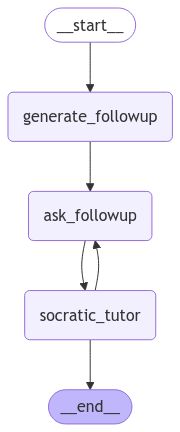

In [32]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass